# IMP.pmi Tutorial Handout

### Integrating EM and Crosslinking data to localize five subunits of RNA Polymerase III

Authors: Riccardo Pellarin, Max Bonomi, Charles Greenberg, Daniel Saltzberg, Ben Webb

Institut Pasteur, CNRS, C3BI
USCF, Department of bioengineering and therapeutic sciences

The Python Modeling Interface (pmi) is a powerful set of tools designed
to handle all steps of the modeling protocol for
typical modeling problems. It is designed to be used by writing a set of
Python scripts.

IMP.pmi has been used to determine the architecture of several macromolecular complexes, for instance:

[26S-PIP](https://salilab.org/26S-PIPs), [Yeast 40S-eIF3](https://salilab.org/40S-eIF1-eIF3), [Human Complement](https://salilab.org/Complement), [exosome](https://salilab.org/exosome),
    [yeast mediator](https://salilab.org/mediator/), [Nup84](https://salilab.org/nup84), [TFIIH](https://salilab.org/tfiih), [Nup82](https://salilab.org/nup82/), [SEA complex](https://salilab.org/sea), and the [Nuclear Pore Complex](https://salilab.org/npc2018)
    
Each repository above contains the scripts and the data, as well as all the results, that are needed to reproduce the published results. 

For a given system, integrative modeling files are stored in different servers:

- source code is stored in a github repository (e.g., https://github.com/integrativemodeling/npc2018) 
- data files are stored in the Zenodo data server (e.g., https://zenodo.org/record/1194547#.W02gVq3v5UQ)
- structures are stored in the pdb-dev server (e.g., https://pdb-dev.wwpdb.org/)

We will illustrate the use of IMP.pmi by determining the localization of two
subunits of RNA Polymerase III. In the first part we will be utilizing chemical cross-linking coupled with
mass spectrometry (XLMS) combined with comparative models of all subunits. In the second part we will include also cryo-electron microscopy (cryoEM). We will try
to determine the architecture of the complex,
hypothesizing that we know the architecture of the core, and aiming to localize the position of C53, C37, C34, C82, and C31. The example can be easily generalized to any other set of subunits.

IMP.pmi references

[Saltzberg et al. 2018](https://salilab.org/pdf/Saltzberg_MethodsMolBiol_2019.pdf)

[Bonomi et al. 2018](https://salilab.org/pdf/Bonomi_Structure_2018.pdf)



## Installation

The current version of the Tutorial is guaranteed to work with IMP 2.11.0. This version can be installed un many plaforms using [anaconda](https://anaconda.org/salilab/imp), which provides all the dependencies.

To work through the example on your own system, you will need the following
packages installed in addition to [IMP itself](https://integrativemodeling.org/nightly/doc/manual/installation.html):

- [numpy and scipy](http://www.scipy.org/scipylib/download.html)
  for matrix and linear algebra

- [scikit-learn](http://scikit-learn.org/stable/install.html)
  for k-means clustering

- [matplotlib](http://matplotlib.org/downloads.html)
  for plotting results

- [Chimera](https://www.cgl.ucsf.edu/chimera/download.html)
  for visualization of results

On a Mac you can get them using the
[pip](https://pypi.python.org/pypi/pip) tool, e.g. by running a command like
`sudo easy_install pip`, then install the packages with something like
`sudo pip install scikit-learn; sudo pip install matplotlib`. `numpy` and `scipy` are already installed on modern Macs. Something
similar may also work on a Linux box, although it's probably better to install
the packages using the distribution's package manager, such as `yum` or
`apt-get`.)

Then download the input files, either by 
[cloning the GitHub repository](https://github.com/salilab/imp_tutorial/tree/develop)
or by [downloading the zip file](https://github.com/salilab/imp_tutorial/archive/develop.zip).

The rnapoliii example scripts are contained in the directory `modeling`.

## Table of Content

[//]: # (To compile the Table of Content run `python tools/compile_toc.py Tutorial.ipynb` and paste the output here below)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Background of RNA Polymerase III ](#3_Background_of_RNA_Polymerase_III)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Integrative Modeling using IMP ](#4_Integrative_Modeling_using_IMP)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ The four stages of Integrative Modeling ](#3_The_four_stages_of_Integrative_Modeling)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Running the script ](#3_Running_the_script)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 1 - Gathering of data ](#Stage_1_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Data for yeast RNA Polymerase III ](#Data_rnapoliii_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 2 - Representation of subunits and translation of the data into spatial restraints ](#Stage_2_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Setting up Model Representation and Degrees of Freedom in IMP ](#Setting_up_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Hierarchy ](#Hierarchy_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Dissecting the script ](#Dissecting_the_script_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Model Representation Using a Topology File. ](#Topology_file_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Building the System Representation and Degrees of Freedom ](#Representation_and_DOF_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Scoring Function ](#Scoring_Function_3) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Connectivity Restraint ](#Connectivity_Restraint_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Excluded Volume Restraint ](#Excluded_Volume_Restraint_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Crosslinks - dataset 1 ](#Crosslink_1_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Crosslinks - dataset 2 ](#Crosslink_2_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Electron Microscopy Restraint ](#EM_4) 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 3 - Sampling ](#Sampling_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Modeling Output ](#Output_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[  Using `StatHierarchyHandler` for inline analysis ](#ProcessOutput_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Stage 4 - Analysis ](#Analysis_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Clustering top models using `analysis.py` ](#Clustering_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Structural Uncertainty of the solutions ](#uncertainty_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Accuracy evaluation ](#Accuracy_3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[ Sampling Exhaustiveness ](#Sampling_Exhaustiveness_3)



## Background of RNA Polymerase III <a name="3_Background_of_RNA_Polymerase_III"></a>

[RNA Pol III](http://en.wikipedia.org/wiki/RNA_polymerase_III) is a eukaryotic complex that catalyzes DNA transcription into ribosomal 5S rRNA and tRNA.  Eukaryotic RNA polymerase III contains 17 subunits. The yeast RNA Pol III dissociates into core, stalk, heterodimer (C53/C37), and heterotrimer (C82/C34/C31).


### Integrative Modeling using IMP <a name="4_Integrative_Modeling_using_IMP"></a>

This example will use data from chemical cross linking, EM and comparative models to localize the 5 subunits of the RNA Polymerase III heterodimer and heterotrimer, to a fixed core of the remaining 12 subunits.  

<img src="files/images/rnapolii_integrative.png" alt="Drawing" style="width: 600px;"/>

### The four stages of Integrative Modeling <a name="3_The_four_stages_of_Integrative_Modeling"></a>

Structural modeling using IMP is divided into [four stages](@ref procedure).

Click the links below to see a breakdown of all the modeling steps.


* [Stage 1](#Stage_1_2)) Collect biophysical data that can be used as structural restraints and constraints
  
* [Stage 2](#Stage_2_2)) Define representations for the RNA Pol III structural model and define each data point as a scoring function.

* [Stage 3](#Sampling_2)) Run a sampling protocol to find good scoring conformations.  

* [Stage 4](#Analysis_3)) Analysis of the good scoring conformations.  Clustering; uncertainty; precision; etc...

### Running the script <a name="3_Running_the_script"></a>

The first three modeling stages are all contained within one script, `modeling.py`. You can get started by simply changing into the `modeling` directory and then running the script with Python:

```
python modeling.py
```

It will take a very long time to complete the sampling; to get an idea of what's going on you can run it with only 50 output frames by adding the `--test` option:

```
python modeling.py --test
```

## Stage 1 - Gathering of data <a name="Stage_1_2"></a>

In this stage, we find all available experimental data that we wish to utilize in structural modeling.  In theory, any method that provides information about absolute or relative structural information can be used.

### Data for yeast RNA Polymerase III <a name="Data_rnapoliii_3"></a>
The `rnapoliii/data` folder in the tutorial input files contains the data included in this example:

* Sequence information (FASTA files for each subunit)
* [10 Angstrom Electron density map](https://www.ebi.ac.uk/pdbe/entry/emdb/EMD-1804) (`.mrc`, `.txt` files)
* [High resolution structure from comparative modeling against Pol II structure](http://www.rcsb.org/pdb/explore/explore.do?structureId=1WCM) (PDB file)
* Chemical crosslinking datasets (we use two data sets, the apo  and DNA bound complexes, both from [Ferber and Kosinski](https://www.ncbi.nlm.nih.gov/pubmed/27111507))


**FASTA File**  
Each residue included in modeling must be explicitly defined in the FASTA text file.  Each individual component (i.e., a protein chain) is identified by a string in the FASTA header line.  From `1WCM.fasta.txt`:

    >P20434
    MDQENERNISRLWRAFRTVKEMVKDRGYFITQEEVELPLEDFKAKYCDSMGRPQRKMMSF
    QANPTEESISKFPDMGSLWVEFCDEPSVGVKTMKTFVIHIQEKNFQTGIFVYQNNITPSA
    MKLVPSIPPATIETFNEAALVVNITHHELVPKHIRLSSDEKRELLKRYRLKESQLPRIQR
    ADPVALYLGLKRGEVVKIIRKSETSGRYASYRICM
    >P20435
    MSDYEEAFNDGNENFEDFDVEHFSDEETYEEKPQFKDGETTDANGKTIVTGGNGPEDFQQ
    HEQIRRKTLKEKAIPKDQRATTPYMTKYERARILGTRALQISMNAPVFVDLEGETDPLRI
    AMKELAEKKIPLVIRRYLPDGSFEDWSVEELIVDL

defines two chains with unique IDs of P20434 and P20435 respectively.  The entire complex is 17 chains and 6263 residues.

**Electron Density Map**  
The electron density map of the entire RNA Poly III complex is at 10 Angstrom resolution.  The raw data file for this is stored in `emd_1804_10A_2010.mrc`.

<figure><img src="files/images/rnapolii_em_raw.png" width="200px" />
<figcaption>_Electron microscopy density map for yeast RNA Polymerase III_</figcaption></figure>

**Electron Density as Gaussian Mixture Models**  
Gaussian mixture models (GMMs) are used to greatly speed up scoring by approximating the electron density of individual subunits and experimental EM maps.  Several GMMs has been created for the experimental density map, with different numbers of gaussians, and are stored in the `*_gmm.mrc`.  The weight, center, and covariance matrix of each Gaussian used to approximate the original EM density can be seen in the corresponding `.txt` file.  

<figure><img src="files/images/rnapolii_em_gmm_50.png" width="200px" />
<figcaption>_The EM data represented as a 50 Gaussian mixture model_</figcaption></figure>


**PDB File**  
High resolution coordinates for all 17 chains of RNA Pol III are found in `.pdb` files.  

<figure><img src="files/images/rnapolii_all_1wc4.png" width="200px" />
<figcaption>_Coordinates from PDBID [1WCM](http://www.rcsb.org/pdb/explore.do?structureId=1wcm)_</figcaption></figure>

**Chemical Cross-Links**  
All chemical cross-linking data is located in `FerberKosinski2016_apo.csv` and `FerberKosinski2016_apo.csv`.  These files contain multiple comma-separated columns; four of these specify the protein and residue number for each of the two linker residues. The length of the DSS/BS3 cross-linker reagent, 21 angstroms, will be specified later in the modeling script.  

## Stage 2 - Representation of subunits and translation of the data into spatial restraints <a name="Stage_2_2"></a>


In this stage, we will initially define a representation of the system. Afterwards, we will convert the data into spatial restraints.  This is performed using the script `modeling/modeling.py` and uses the
topology file, `topology_poliii.txt` and `topology_poliii_cryoem.txt`, to define the system components and their representation
parameters.

### Setting up Model Representation and Degrees of Freedom in IMP <a name="Setting_up_3"></a>

Very generally, the *representation* of a system is defined by all the variables that need to be determined based on input information, including the assignment of the system components to geometric objects (e.g. points, spheres, ellipsoids, and 3D Gaussian density functions). 

Our RNA Pol II representation employs **spherical beads** of varying sizes and **3D Gaussians**, which coarsen domains of the complex using several resolution scales simultaneously. Here below we show the representation for the Pol II case, but the same applies to Pol III.

<figure><img src="files/images/rnapolii_Multi-scale_representation.png" width="600px" />
<figcaption>_Multi-scale representation of Rpb1 subunit of RNA Pol II_</figcaption></figure>

The **spatial restraints** will be applied to individual resolution scales as appropriate. 

Beads and Gaussians of a given domain are arranged into either a rigid body or a flexible string, based on the crystallographic structures. 

The GMM of a subunit is the set of all 3D Gaussians used to represent it; it will be used to calculate the EM score. The calculation of the GMM of a subunit can be done automatically in the **topology file**.
For the purposes of this tutorial, we already created these for all subunits and placed them in the `rnapoliii/data` directory in their respective `.mrc` and `.txt` files (eg, `ABC14.5.0.txt`). 

In a **rigid body**, all the beads and the Gaussians of a given domain have their relative distances constrained during configurational sampling, while in a **flexible string** the beads and the Gaussians are restrained by the sequence connectivity. 


<figure><img src="files/images/rnapolii_rb.png" width="300px" />
<figcaption>_Rigid Bodies and beads_</figcaption></figure>

**super rigid bodies** are sets of rigid bodies and beads that will move together in an additional Monte Carlo move.

<figure><img src="files/images/rnapolii_srb.png" width="300px" />
<figcaption>_Super Rigid Bodies_</figcaption></figure>

**chain_of_super_rigid_bodies** are additional degrees of freedom along the connectivity chain of a subunit. It groups sequence-connected rigid domains and/or beads into overlapping pairs and triplets. Each of these groups will be moved rigidly. This mover helps to sample more efficiently complex topologies, made of several rigid bodies, connected by flexible linkers.

<figure><img src="files/images/rnapolii_cosrb.png" width="300px" />
<figcaption>_Chain of Super Rigid Bodies_</figcaption></figure>


### Hierarchy <a name="Hierarchy_3"></a>

A hierarchy in IMP is a tree that stores information on molecules, residues, atoms, etc., where the resolution of the representation increases as you move further from the root. IMP.pmi was designed to support a specialised multi-state/multi-copy/multi-resolution hierarchy

<figure><img src="files/images/rnapolii_hierarchy.png" width="600px" />
<figcaption>_PMI hierarchy_</figcaption></figure>

The **States** are used as putative structural and compositional alternatives of the system. 

Each **State** contains the **Molecules**, and each Molecule can occur in different stochiometric **Copies** (eg. here MolA has three identical copies: MolA.0, MolA.1, and MolA.2). 

The **Molecules** contains structures (ie, particles with coordinates, masses and radii) classified by several **resolutions**: Atomic (Resolution 0), Residues (Resolution 1), Fragments (Resolution > 1), and the Gaussians (Densities). 

All structures (except the densities) are represented by Spheres with appropriate radius and mass. The resolutions concur simultanously, therefore the same part of the molecule can be represented by several resolutions.

### Dissecting the script <a name="Dissecting_the_script_3"></a>

The script `modeling/modeling.py` sets up the representation of the system and the restraint.

The first part of the script import the necessary libraries.

In [3]:
from __future__ import print_function

import IMP
import IMP.core
import IMP.pmi.restraints.crosslinking
import IMP.pmi.restraints.stereochemistry
import IMP.pmi.restraints.em
import IMP.pmi.representation
import IMP.pmi.tools

import IMP.pmi.macros
import IMP.pmi.topology

import os
import sys

import warnings
warnings.filterwarnings('ignore')

Then setup the relevant paths of the input files. There hare two options. Either we use only the crosslinks, or we use the crosslinks with the cryoEM data. This option is encoded in the following variable:

In [ ]:
cryoEM=False

In [4]:
#crosslink data

datadirectory = "../rnapoliii/data/"
output_directory = "./output"

if not cryoEM:
    topology_file = datadirectory+"topology_poliii.txt" 
else:
    topology_file = datadirectory+"topology_poliii_cryoem.txt" 

#### Model Representation Using a Topology File <a name="Topology_file_4"></a>

This part of the script defines the topology of the system, including the hierarchy, the representation and the degrees of freedom. This is the content of the file `../data/topology_poliii.txt`, which is in a table format:

In [ ]:
'''
|molecule_name|color      |fasta_fn       |fasta_id|pdb_fn                           |chain|residue_range|pdb_offset|bead_size|em_residues_per_gaussian|rigid_body|super_rigid_body|chain_of_super_rigid_bodies|
|ABC23        |0.0,1.0,1.0|sequences.fasta|P20435  |Pol3_core_Model_on4c3i.pdb       |F    |1,END        |0         |10       |10                      |1         |1               |1                          |
|ABC10beta    |0.5,1.0,0.5|sequences.fasta|P22139  |Pol3_core_Model_on4c3i.pdb       |J    |1,END        |0         |10       |10                      |1         |1               |1                          |
|ABC14_5      |0.0,1.0,0.0|sequences.fasta|P20436  |Pol3_core_Model_on4c3i.pdb       |H    |1,END        |0         |10       |10                      |1         |1               |1                          |
|ABC27        |0.8,0.1,0.6|sequences.fasta|P20434  |Pol3_core_Model_on4c3i.pdb       |E    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C25          |0.0,0.5,1.0|sequences.fasta|P35718  |Pol3_core_Model_on4c3i.pdb       |G    |1,END        |0         |10       |10                      |1         |1               |1                          |
|AC40         |1.0,0.0,0.0|sequences.fasta|P07703  |Pol3_core_Model_on4c3i.pdb       |C    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C160         |0.7,0.7,0.7|sequences.fasta|P04051  |Pol3_core_Model_on4c3i.pdb       |A    |1,END        |0         |10       |10                      |1         |1               |1                          |
|ABC10alpha   |0.0,0.0,1.0|sequences.fasta|P40422  |Pol3_core_Model_on4c3i.pdb       |L    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C128         |1.0,0.8,0.7|sequences.fasta|P22276  |Pol3_core_Model_on4c3i.pdb       |B    |1,END        |0         |10       |10                      |1         |1               |1                          |
|AC19         |1.0,0.6,0.0|sequences.fasta|P28000  |Pol3_core_Model_on4c3i.pdb       |K    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C11          |1.0,1.0,0.0|sequences.fasta|Q04307  |Pol3_core_Model_on4c3i.pdb       |I    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C17          |1.0,0.0,0.5|sequences.fasta|P47076  |Pol3_core_Model_on4c3i.pdb       |D    |1,END        |0         |10       |10                      |1         |1               |1                          |
|C31          |1.0,1.0,0.5|sequences.fasta|P17890  |BEADS                            |Q    |1,END        |0         |10       |10                      |2         |2               |2                          |
|C34          |0.9,0.6,0.1|sequences.fasta|P32910  |C34_wHTH1_Model_on2dk8_A.pdb     |P    |1,76         |0         |10       |10                      |3         |3               |3                          |
|C34          |0.9,0.6,0.1|sequences.fasta|P32910  |BEADS                            |P    |77,86        |0         |10       |10                      |4         |3               |3                          |
|C34          |0.9,0.6,0.1|sequences.fasta|P32910  |C34_wHTH2_Model_on2dk5_A.pdb     |P    |87,152       |0         |10       |10                      |5         |3               |3                          |
|C34          |0.9,0.6,0.1|sequences.fasta|P32910  |BEADS                            |P    |153,179      |0         |10       |10                      |6         |3               |3                          |
|C34          |0.9,0.6,0.1|sequences.fasta|P32910  |C34_wHTH3_Model_on1ldd_A.pdb     |P    |180,END      |0         |10       |10                      |7         |3               |3                          |
|C53          |0.4,0.8,1.0|sequences.fasta|P25441  |C37_C53_dimer.Model_on4c3i_MN.pdb|N    |1,END        |0         |10       |10                      |8         |8               |8                          |
|C37          |0.6,0.1,0.6|sequences.fasta|P36121  |C37_C53_dimer.Model_on4c3i_MN.pdb|M    |1,181        |0         |10       |10                      |8         |8               |8                          |
|C37          |0.6,0.1,0.6|sequences.fasta|P36121  |BEADS                            |     |182,END      |0         |10       |10                      |8         |8               |8                          |
|C82          |1.0,0.3,0.0|sequences.fasta|P32349  |C82_Model_on2xub_A.pdb           |O    |1,END        |0         |10       |10                      |9         |9               |9                          |
'''

Using the table above we define the overall topology: we introduce the molecules with their sequence and their known structure, and define the movers. Each line is a user-defined molecular **Domain**, and each column contains the specifics needed to build the system:

* `molecule_name`: Name of the Molecule and the name of the Hierarchy that contains the corresponding Domain.
* `color`: The color used in the output coordinates file. Uses [Chimera names](https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/colortables.html) (e.g. "red"), or R,G,B values as three comma-separated floating point numbers from 0 to 1 (e.g. "1.0, 0.0, 0.0") or a 6-digit hex string starting with '#' (e.g. 0xff0000).
* `fasta_fn`: Name of the FASTA file containing the sequence for this Molecule.
* `fasta_id`: header line of FASTA (without the ">" character).
* `pdb_fn`: Name of PDB file with coordinates (if available). If left empty, will set up as BEADS (you can also explictly specify "BEADS"). Can also write "IDEAL_HELIX".
* `chain`: Chain ID of this Domain in the PDB file.
* `residue_range`: Comma delimited pair defining the indexes of the first and the last residue of the Domain. Can leave empty or use 'all' for entire sequence from PDB file. The second item in the pair can be 'END' to select the last residue in the sequence defined in the FASTA file.
* `pdb_offset`: PMI always numbers residues starting from 1 (to match the FASTA file). If the PDB does not match this numbering, an offset can be specified here. It is added to the PDB residue number to get the FASTA number. For example, if the first residue in the PDB file is numbered 10, use an offset of -9.
* `bead_size`: The size (in residues) of beads used to model Fragments not covered by PDB coordinates.
* `em_residues`: The number of Gaussians used to model the density of this domain. Can be set to zero/empty to exclude Domains from the EM restraint. The GMM files will be written to `gmm_dir`.
* `rigid_body`: Leave empty to treat this Domain flexibly. Otherwise, use a unique Rigid Body identifier (an integer). All Domains with the same Rigid Body identifier will be collected in the same Rigid Body.
* `super_rigid_body`: Like the Rigid Body, the user can specify a unique Super Rigid Body identifier.
* `chain_of_super_rigid_bodies` Like the Rigid Body, the user can specify a unique Chain of Super Rigid Body identifier.

The first section defines where input files are located.  The topology file defines how the system components are structurally represented. `target_gmm_file` stores the EM map for the entire complex, which has already been converted into a Gaussian mixture model.

In [5]:
# Initialize IMP model
m = IMP.Model()

# Read in the topology file.  
# Specify the directory where the PDB files, FASTA files and GMM files are
topology = IMP.pmi.topology.TopologyReader(topology_file, 
                                  pdb_dir=datadirectory, 
                                  fasta_dir=datadirectory, 
                                  gmm_dir=datadirectory)

In [6]:
# Use the BuildSystem macro to build states from the topology file
bs = IMP.pmi.macros.BuildSystem(m)

In [7]:
# Each state can be specified by a topology file.
bs.add_state(topology)

BuildSystem.add_state: setting up molecule ABC23 copy number 0
BuildSystem.add_state: molecule ABC23 sequence has 155 residues
BuildSystem.add_state: ---- setting up domain 0 of molecule ABC23
BuildSystem.add_state: -------- domain 0 of molecule ABC23 extends from residue 1 to residue 155 
BuildSystem.add_state: -------- domain 0 of molecule ABC23 represented by pdb file ../rnapoliii/data/Pol3_core_Model_on4c3i.pdb 
BuildSystem.add_state: -------- domain 0 of molecule ABC23 represented by gaussians 
BuildSystem.add_state: setting up molecule ABC10beta copy number 0
BuildSystem.add_state: molecule ABC10beta sequence has 70 residues
BuildSystem.add_state: ---- setting up domain 0 of molecule ABC10beta
BuildSystem.add_state: -------- domain 0 of molecule ABC10beta extends from residue 1 to residue 70 
BuildSystem.add_state: -------- domain 0 of molecule ABC10beta represented by pdb file ../rnapoliii/data/Pol3_core_Model_on4c3i.pdb 
BuildSystem.add_state: -------- domain 0 of molecule ABC1

BuildSystem.add_state: -------- domain 0 of molecule C37 represented by gaussians 
BuildSystem.add_state: ---- setting up domain 1 of molecule C37
BuildSystem.add_state: -------- domain 1 of molecule C37 extends from residue 182 to residue 282 
BuildSystem.add_state: -------- domain 1 of molecule C37 represented by BEADS 
BuildSystem.add_state: setting up molecule C82 copy number 0
BuildSystem.add_state: molecule C82 sequence has 654 residues
BuildSystem.add_state: ---- setting up domain 0 of molecule C82
BuildSystem.add_state: -------- domain 0 of molecule C82 extends from residue 1 to residue 654 
BuildSystem.add_state: -------- domain 0 of molecule C82 represented by pdb file ../rnapoliii/data/C82_Model_on2xub_A.pdb 
BuildSystem.add_state: -------- domain 0 of molecule C82 represented by gaussians 
BuildSystem.add_state: State 1 added
BuildSystem.add_state: setting up molecule ABC23 copy number 0
BuildSystem.add_state: molecule ABC23 sequence has 155 residues
BuildSystem.add_state: 

BuildSystem.add_state: -------- domain 0 of molecule C37 represented by gaussians 
BuildSystem.add_state: ---- setting up domain 1 of molecule C37
BuildSystem.add_state: -------- domain 1 of molecule C37 extends from residue 182 to residue 282 
BuildSystem.add_state: -------- domain 1 of molecule C37 represented by BEADS 
BuildSystem.add_state: setting up molecule C82 copy number 0
BuildSystem.add_state: molecule C82 sequence has 654 residues
BuildSystem.add_state: ---- setting up domain 0 of molecule C82
BuildSystem.add_state: -------- domain 0 of molecule C82 extends from residue 1 to residue 654 
BuildSystem.add_state: -------- domain 0 of molecule C82 represented by pdb file ../rnapoliii/data/C82_Model_on2xub_A.pdb 
BuildSystem.add_state: -------- domain 0 of molecule C82 represented by gaussians 
BuildSystem.add_state: State 2 added


#### Building the System Representation and Degrees of Freedom <a name="Representation_and_DOF_4"></a>

Here we can set the **Degrees of Freedom** parameters, which should be
optimized according to MC acceptance ratios. There are three kind of movers: Rigid Body, Bead, and Super Rigid Body. 

`max_rb_trans` and `max_rb_rot` are the 
maximum translation and rotation of the Rigid Body mover, `max_srb_trans` and 
`max_srb_rot` are the maximum translation and rotation of the Super Rigid Body mover
and `max_bead_trans` is the maximum translation of the Bead Mover.

The excecution of the macro will create the representation (as a molecular hierarchy) by reading the topology file, then return the root of this hierarchy (`root_hier`) and the degrees of freedom (`dof`) objects, both of which are used later on.


In [6]:
root_hier, dof = bs.execute_macro(max_rb_trans=4.0, 
                                  max_rb_rot=0.3, 
                                  max_bead_trans=4.0, 
                                  max_srb_trans=4.0,
                                  max_srb_rot=0.3)

BuildSystem.execute_macro: building representations
done building "ABC23" Chain A Copy: 0
done building "ABC10beta" Chain B Copy: 0
done building "ABC14_5" Chain C Copy: 0
done building "ABC27" Chain D Copy: 0
done building "C25" Chain E Copy: 0
done building "AC40" Chain F Copy: 0
done building "C160" Chain G Copy: 0
done building "ABC10alpha" Chain H Copy: 0
done building "C128" Chain I Copy: 0
done building "AC19" Chain J Copy: 0
done building "C11" Chain K Copy: 0
done building "C17" Chain L Copy: 0
done building "C31" Chain M Copy: 0
done building "C34" Chain N Copy: 0
done building "C53" Chain O Copy: 0
done building "C37" Chain P Copy: 0
done building "C82" Chain Q Copy: 0
done building "ABC23" Chain A Copy: 0
done building "ABC10beta" Chain B Copy: 0
done building "ABC14_5" Chain C Copy: 0
done building "ABC27" Chain D Copy: 0
done building "C25" Chain E Copy: 0
done building "AC40" Chain F Copy: 0
done building "C160" Chain G Copy: 0
done building "ABC10alpha" Chain H Copy: 0


BuildSystem.execute_macro: -------- building super rigid body ['ABC23..0', 'ABC10beta..0', 'ABC14_5..0', 'ABC27..0', 'C25..0', 'AC40..0', 'C160..0', 'ABC10alpha..0', 'C128..0', 'AC19..0', 'C11..0', 'C17..0']
BuildSystem.execute_macro: -------- adding ABC23..0
BuildSystem.execute_macro: -------- adding ABC10beta..0
BuildSystem.execute_macro: -------- adding ABC14_5..0
BuildSystem.execute_macro: -------- adding ABC27..0
BuildSystem.execute_macro: -------- adding C25..0
BuildSystem.execute_macro: -------- adding AC40..0
BuildSystem.execute_macro: -------- adding C160..0
BuildSystem.execute_macro: -------- adding ABC10alpha..0
BuildSystem.execute_macro: -------- adding C128..0
BuildSystem.execute_macro: -------- adding AC19..0
BuildSystem.execute_macro: -------- adding C11..0
BuildSystem.execute_macro: -------- adding C17..0
BuildSystem.execute_macro: -------- creating super rigid body with max_trans 4.0 max_rot 0.3 
BuildSystem.execute_macro: -------- building super rigid body ['C53..0', 

At this point we have created the complete representation of the system. If displayed using Chimera the subunits should look like this (where the left and right panels are the assembled complex exploded view, respectively)

<figure><img src="files/images/rnapolii_domain_representation.png" width="600px" />
<figcaption>_Domain Representation_</figcaption></figure>

We can display the representation of system the along the sequence. Each color corresponds to a domain of the complex assigned to an individual rigid body. White spaces are the beads.

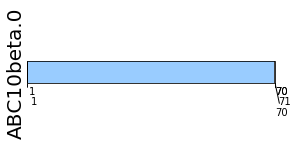

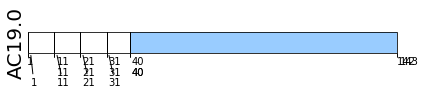

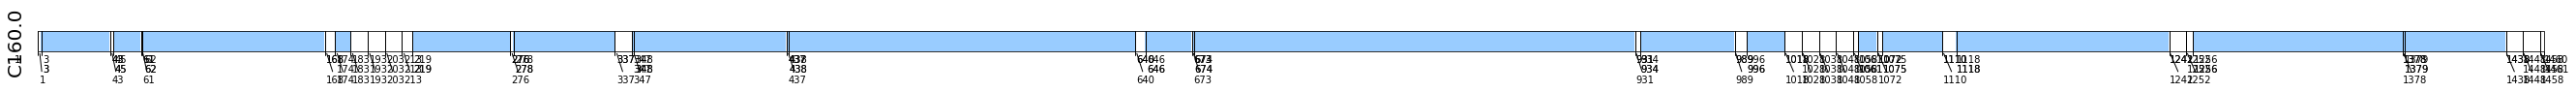

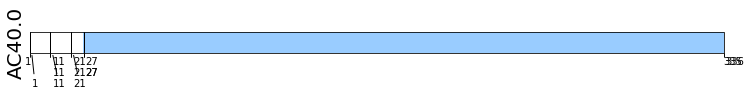

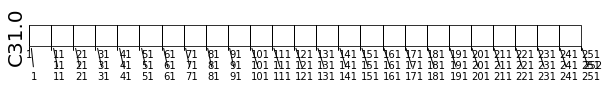

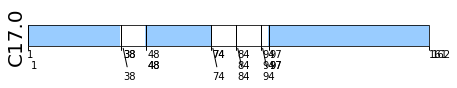

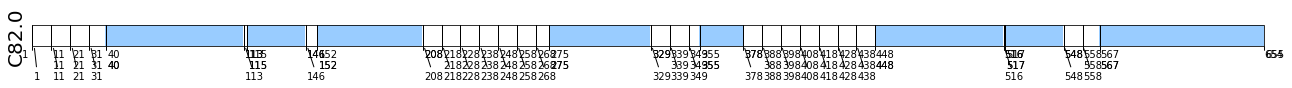

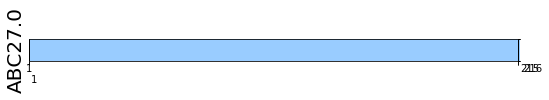

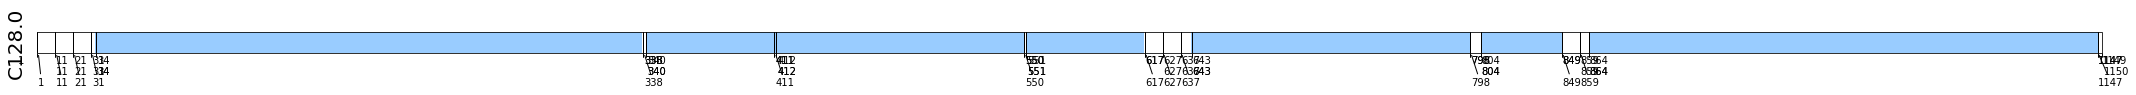

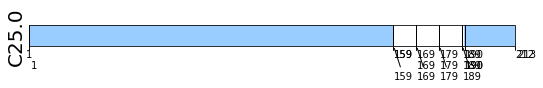

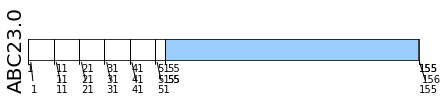

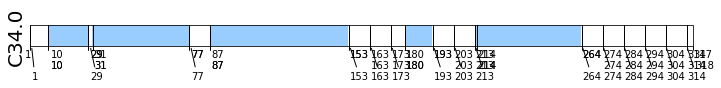

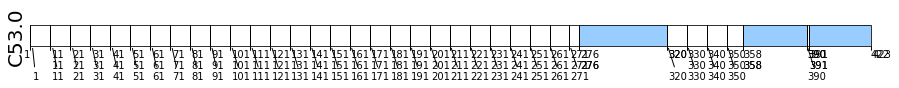

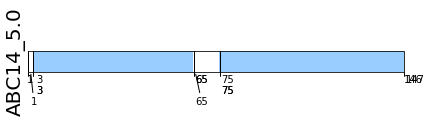

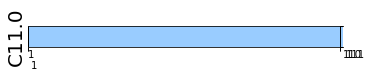

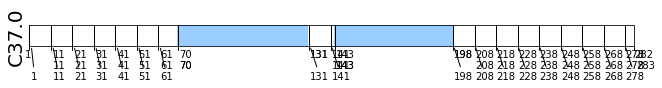

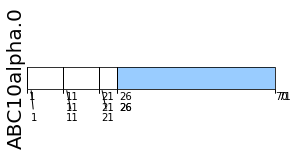

In [7]:
%matplotlib inline

import IMP.pmi.plotting
import IMP.pmi.plotting.topology

IMP.pmi.plotting.topology.draw_component_composition(dof)

We randomize the initial configuration to remove any bias from the initial starting configuration read from input files. Since each subunit is composed of rigid bodies (i.e., beads constrained in a structure) and flexible beads, the configuration of the system is initialized by displacing each mobile rigid body and each bead randomly by 50 Angstroms, rotating them randomly, and moving them far enough from each other to prevent any steric clashes. 

The `excluded_rigid_bodies=fixed_rbs` will exclude from the randomization everything that was fixed above.

In [9]:
# Shuffle the rigid body and beads configuration of only the molecules we are interested in (Rpb4 and Rpb7)
IMP.pmi.tools.shuffle_configuration(root_hier,
                                    max_translation=50, 
                                    verbose=False,
                                    cutoff=5.0,
                                    niterations=100)

shuffling 18 rigid bodies
shuffling 378 flexible beads


### Scoring Function <a name="Scoring_Function_3"></a>

After defining the representation of the model, we build the **restraints** by which the individual structural models will be scored based on the input data.

The sum of all of these restraints is our **scoring function**. 
For all restraints, calling `add_to_model()` incorporates them into the scoring function.
Appending the restraints to the `outputobjects` list reports them in the log files produced in the sampling.

In [10]:
outputobjects = [] # reporter objects...output is included in the stat file

#### Connectivity Restraint <a name="Connectivity_Restraint_4"></a>

In [11]:
# Connectivity keeps things connected along the backbone (ignores if inside same rigid body)
mols = IMP.pmi.tools.get_molecules(root_hier)
for mol in mols:
    molname=mol.get_name()        
    IMP.pmi.tools.display_bonds(mol)
    cr = IMP.pmi.restraints.stereochemistry.ConnectivityRestraint(mol,scale=2.0)
    cr.add_to_model()
    cr.set_label(molname)
    outputobjects.append(cr)

Adding sequence connectivity restraint between Residue_69  and  70_bead of distance 7.2
Adding sequence connectivity restraint between Residue_37  and  38-47_bead of distance 7.2
Adding sequence connectivity restraint between 38-47_bead  and  Residue_48 of distance 7.2
Adding sequence connectivity restraint between Residue_73  and  74-83_bead of distance 7.2
Adding sequence connectivity restraint between 74-83_bead  and  84-93_bead of distance 7.2
Adding sequence connectivity restraint between 84-93_bead  and  94-96_bead of distance 7.2
Adding sequence connectivity restraint between 94-96_bead  and  Residue_97 of distance 7.2
Adding sequence connectivity restraint between 1-10_bead  and  11-20_bead of distance 7.2
Adding sequence connectivity restraint between 11-20_bead  and  21-30_bead of distance 7.2
Adding sequence connectivity restraint between 21-30_bead  and  31-40_bead of distance 7.2
Adding sequence connectivity restraint between 31-40_bead  and  41-50_bead of distance 7.2
Add

Adding sequence connectivity restraint between Residue_319  and  320-329_bead of distance 7.2
Adding sequence connectivity restraint between 320-329_bead  and  330-339_bead of distance 7.2
Adding sequence connectivity restraint between 330-339_bead  and  340-349_bead of distance 7.2
Adding sequence connectivity restraint between 340-349_bead  and  350-357_bead of distance 7.2
Adding sequence connectivity restraint between 350-357_bead  and  Residue_358 of distance 7.2
Adding sequence connectivity restraint between Residue_389  and  390_bead of distance 7.2
Adding sequence connectivity restraint between 390_bead  and  Residue_391 of distance 7.2
Adding sequence connectivity restraint between Residue_158  and  159-168_bead of distance 7.2
Adding sequence connectivity restraint between 159-168_bead  and  169-178_bead of distance 7.2
Adding sequence connectivity restraint between 169-178_bead  and  179-188_bead of distance 7.2
Adding sequence connectivity restraint between 179-188_bead  an

Adding sequence connectivity restraint between 141-142_bead  and  Residue_143 of distance 7.2
Adding sequence connectivity restraint between Residue_197  and  198-207_bead of distance 7.2
Adding sequence connectivity restraint between 198-207_bead  and  208-217_bead of distance 7.2
Adding sequence connectivity restraint between 208-217_bead  and  218-227_bead of distance 7.2
Adding sequence connectivity restraint between 218-227_bead  and  228-237_bead of distance 7.2
Adding sequence connectivity restraint between 228-237_bead  and  238-247_bead of distance 7.2
Adding sequence connectivity restraint between 238-247_bead  and  248-257_bead of distance 7.2
Adding sequence connectivity restraint between 248-257_bead  and  258-267_bead of distance 7.2
Adding sequence connectivity restraint between 258-267_bead  and  268-277_bead of distance 7.2
Adding sequence connectivity restraint between 268-277_bead  and  278-282_bead of distance 7.2
Adding sequence connectivity restraint between 1-10_

Adding sequence connectivity restraint between 31-40_bead  and  41-50_bead of distance 7.2
Adding sequence connectivity restraint between 41-50_bead  and  51-60_bead of distance 7.2
Adding sequence connectivity restraint between 51-60_bead  and  61-70_bead of distance 7.2
Adding sequence connectivity restraint between 61-70_bead  and  71-80_bead of distance 7.2
Adding sequence connectivity restraint between 71-80_bead  and  81-90_bead of distance 7.2
Adding sequence connectivity restraint between 81-90_bead  and  91-100_bead of distance 7.2
Adding sequence connectivity restraint between 91-100_bead  and  101-110_bead of distance 7.2
Adding sequence connectivity restraint between 101-110_bead  and  111-120_bead of distance 7.2
Adding sequence connectivity restraint between 111-120_bead  and  121-130_bead of distance 7.2
Adding sequence connectivity restraint between 121-130_bead  and  131-140_bead of distance 7.2
Adding sequence connectivity restraint between 131-140_bead  and  141-150_

#### Excluded Volume Restraint <a name="Excluded_Volume_Restraint_4"></a>

This restraint simply keeps subunits from occupying the same space. We can safely apply this to the low-resolution representation of the system, for speed.

In [12]:
ev = IMP.pmi.restraints.stereochemistry.ExcludedVolumeSphere(
                                         included_objects=root_hier,
                                         resolution=10)
ev.add_to_model()         # add to scoring function
outputobjects.append(ev)  # add to output

#### Crosslinks - dataset 1 <a name="Crosslink_1_4"></a>

A crosslinking restraint is implemented as a distance restraint between two residues.  The two residues are each defined by the protein (component) name and the residue number.  The script here extracts the correct four columns that provide this information from the input data file, plus additional data if available such as a confidence score.

To use this restraint we have to first define the data format.  
 
In this case the data file, `data/FerberKosinski2016_apo.csv` is in a simple comma-separated variable (CSV) format, an excerpt of which is shown below:

```
Protein1,Protein2,AbsPos1,AbsPos2,ld-Score
C128,C53,570,370,50.4
C82,C34,313,204,47.18
...
```

In [13]:
# We then initialize a CrossLinkDataBase that uses a keywords converter to map column to information.
# The required fields are the protein and residue number for each side of the crosslink.
xldbkwc = IMP.pmi.io.crosslink.CrossLinkDataBaseKeywordsConverter()
xldbkwc.set_protein1_key("Protein1")
xldbkwc.set_protein2_key("Protein2")
xldbkwc.set_residue1_key("AbsPos1")
xldbkwc.set_residue2_key("AbsPos2")
xldbkwc.set_id_score_key("ld-Score")

xl1 = IMP.pmi.io.crosslink.CrossLinkDataBase(xldbkwc)
xl1.create_set_from_file(datadirectory+'FerberKosinski2016_apo.csv')
xl1.set_name("APO")

xl2 = IMP.pmi.io.crosslink.CrossLinkDataBase(xldbkwc)
xl2.create_set_from_file(datadirectory+'FerberKosinski2016_DNA.csv')
xl2.set_name("DNA")

# Append the xl2 dataset to the xl1 dataset to create a larger dataset
xl1.append_database(xl2)

# Rename one protein name
xl1.rename_proteins({"ABC14.5":"ABC14_5"})

# Create 3 confidence classes
xl1.classify_crosslinks_by_score(3)

# Now, we set up the restraint.
xl1rest = IMP.pmi.restraints.crosslinking.CrossLinkingMassSpectrometryRestraint(
                                   root_hier=root_hier,  # The root hierarchy
                                   CrossLinkDataBase=xl1,# The XLDB defined above
                                   length=21.0,          # Length of the linker in angstroms
                                   slope=0.002,          # A linear term that biases XLed
                                                         # residues together
                                   resolution=1.0,       # Resolution at which to apply the restraint. 
                                                         # Either 1 (residue) or 0 (atomic)
                                   label="XL",           # Used to label output in the stat file
                                   weight=10.)           # Weight applied to all crosslinks 
                                                         # in this dataset
xl1rest.add_to_model()
outputobjects.append(xl1rest)


gathering copies
defaultdict(<type 'int'>, {'C53': 0, 'ABC23': 0, 'C82': 0, 'ABC27': 0, 'ABC10beta': 0, 'C25': 0, 'AC40': 0, 'C31': 0, 'C160': 0, 'ABC10alpha': 0, 'C128': 0, 'AC19': 0, 'C34': 0, 'C37': 0, 'C17': 0, 'C11': 0})
done pmi2 prelims
generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 570 of chain C128 and residue 370 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_570 and Residue_370

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 570 of chain C128 and residue 370 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_570 and Residue_370

generat

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and residue 170 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_109 and Residue_170

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and residue 170 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_109 and Residue_170

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and residue 170 of chain C128
CrossLinkingMassSpectro

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1127 of chain C160 and residue 479 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_1127 and Residue_479

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1127 of chain C160 and residue 479 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_1127 and Residue_479

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1127 of chain C160 and residue 479 of chain C128
CrossLinkingMassSp

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 197 of chain ABC27 and residue 201 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_197 and Residue_201

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 197 of chain ABC27 and residue 201 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_197 and Residue_201

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 197 of chain ABC27 and residue 201 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIG

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 236 of chain C82 and residue 242 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 228-237_bead and 238-247_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 196 of chain C34 and residue 204 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 193-202_bead and 203-212_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 196 of chain C34 and residue 204 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 166 of chain C160 and residue 149 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_166 and Residue_149

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 166 of chain C160 and residue 149 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_166 and Residue_149

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 166 of chain C160 and residue 149 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sig

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 631 of chain C160 and residue 673 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_631 and 673_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 631 of chain C160 and residue 673 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_631 and 673_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 205 of chain AC40 and residue 168 of chain AC40
CrossLinkingMassSpectrometryR

CrossLinkingMassSpectrometryRestraint: between particles Residue_123 and Residue_129

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 123 of chain ABC23 and residue 129 of chain ABC23
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_123 and Residue_129

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 123 of chain ABC23 and residue 129 of chain ABC23
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_123 and Residue_129

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 123 of chain ABC23

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 33 of chain C128 and residue 9 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 31-33_bead and 1-10_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 33 of chain C128 and residue 9 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 31-33_bead and 1-10_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 33 of chain C128 and residue 9 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi C

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 322 of chain C53 and residue 359 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 320-329_bead and Residue_359

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 322 of chain C53 and residue 359 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 320-329_bead and Residue_359

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 322 of chain C53 and residue 359 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 

CrossLinkingMassSpectrometryRestraint: between particles Residue_109 and Residue_160

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and residue 160 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_109 and Residue_160

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and residue 160 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_109 and Residue_160

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 109 of chain C128 and 

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain ABC27 and residue 45 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_56 and Residue_45

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain ABC27 and residue 45 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_56 and Residue_45

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain ABC27 and residue 45 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 230 of chain C128 and residue 482 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_230 and Residue_482

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 230 of chain C128 and residue 482 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_230 and Residue_482

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 230 of chain C128 and residue 482 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sig


--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 217 of chain C37 and residue 445 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 208-217_bead and Residue_445

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 217 of chain C37 and residue 445 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 208-217_bead and Residue_445

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 217 of chain C37 and residue 445 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sig

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 790 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1028 and Residue_790

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 790 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1028 and Residue_790

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 790 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGM

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 33 of chain C128 and residue 53 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 31-33_bead and Residue_53

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 33 of chain C128 and residue 53 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 31-33_bead and Residue_53

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1240 of chain C160 and residue 1216 of chain C160
CrossLinkingMassSpectrometryR

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 216 of chain C53 and residue 194 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 211-220_bead and Residue_194

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 216 of chain C53 and residue 194 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 211-220_bead and Residue_194

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 216 of chain C53 and residue 194 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 

CrossLinkingMassSpectrometryRestraint: residue 26 of chain C128 and residue 33 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 21-30_bead and 31-33_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 26 of chain C128 and residue 33 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 21-30_bead and 31-33_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 26 of chain C128 and residue 33 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 21-30_bead and 31-33_bead

CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_165 and Residue_166

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1214 of chain C160 and residue 1216 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_1214 and Residue_1216

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1214 of chain C160 and residue 1216 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_1214 and Residue_1216

generating a new crosslink restraint
--------------
CrossLinkingMassSpect

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 203 of chain C34 and residue 204 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 203-212_bead and 203-212_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 203 of chain C34 and residue 204 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 203-212_bead and 203-212_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 203 of chain C34 and residue 204 of chain C34
CrossLinkingMassSpectrome

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 113 of chain C37 and residue 115 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_113 and Residue_115

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 113 of chain C37 and residue 115 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_113 and Residue_115

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 43 of chain C17 and residue 45 of chain C17
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGM

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 251 of chain C82 and residue 255 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 248-257_bead and 248-257_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 251 of chain C82 and residue 255 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 248-257_bead and 248-257_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 251 of chain C82 and residue 255 of chain C82
CrossLinkingMassSpectrome

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 1034 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1028 and Residue_1034

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 1034 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1028 and Residue_1034

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1028 of chain C128 and residue 1034 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 26 of chain C128 and residue 32 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 21-30_bead and 31-33_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 28 of chain ABC10alpha and residue 37 of chain ABC10alpha
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_28 and Residue_37

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 28 of chain ABC10alpha and residue 37 of chain ABC10alpha
CrossLinkingMassSpectrometryRestraint: with si

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 325 of chain C53 and residue 322 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 320-329_bead and Residue_322

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 217 of chain C37 and residue 108 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 208-217_bead and Residue_108

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 217 of chain C37 and residue 108 of chain C34
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 11 of chain C160 and residue 159 of chain C25
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_11 and 159-168_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 11 of chain C160 and residue 159 of chain C25
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_11 and 159-168_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 11 of chain C160 and residue 159 of chain C25
CrossLinkingMassSpectrometryR

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 45 of chain C17 and residue 407 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 38-47_bead and Residue_407

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 45 of chain C17 and residue 407 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 38-47_bead and Residue_407

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 45 of chain C17 and residue 407 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGM

CrossLinkingMassSpectrometryRestraint: residue 179 of chain C31 and residue 146 of chain C31
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 171-180_bead and 141-150_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 179 of chain C31 and residue 146 of chain C31
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 171-180_bead and 141-150_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 179 of chain C31 and residue 146 of chain C31
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 171-180_bead and 

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 75 of chain C128 and residue 78 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_2
CrossLinkingMassSpectrometryRestraint: between particles Residue_75 and Residue_78

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 308 of chain C128 and residue 194 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_308 and Residue_194

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 308 of chain C128 and residue 194 of chain C37
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SI

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 266 of chain C53 and residue 840 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 261-270_bead and Residue_840

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 266 of chain C53 and residue 840 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 261-270_bead and Residue_840

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 145 of chain C25 and residue 92 of chain C17
CrossLinkingMassSpectromet

CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 91-100_bead and Residue_50

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 878 of chain C160 and residue 919 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_878 and Residue_919

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 878 of chain C160 and residue 919 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_878 and Residue_919

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRe

CrossLinkingMassSpectrometryRestraint: residue 538 of chain C160 and residue 123 of chain ABC23
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_538 and Residue_123

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 538 of chain C160 and residue 123 of chain ABC23
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_538 and Residue_123

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 538 of chain C160 and residue 123 of chain ABC23
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_538 


--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1034 of chain C128 and residue 371 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1034 and Residue_371

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1034 of chain C128 and residue 371 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_1034 and Residue_371

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1034 of chain C128 and residue 371 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIG

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain C37 and residue 623 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 51-60_bead and 617-626_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain C37 and residue 623 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 51-60_bead and 617-626_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain C37 and residue 623 of chain C128
CrossLinkingMassSpectrometryR

CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1249 of chain C160 and residue 239 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 1242-1251_bead and Residue_239

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1249 of chain C160 and residue 239 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 1242-1251_bead and Residue_239

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 1249 of chain C160 and residue 239 of chain C128
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SI

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain C37 and residue 359 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 51-60_bead and Residue_359

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 91 of chain C31 and residue 159 of chain C25
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 91-100_bead and 159-168_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 91 of chain C31 and residue 159 of chain C25
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 115 of chain C82 and residue 161 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_115 and Residue_161

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 115 of chain C82 and residue 161 of chain ABC27
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_115 and Residue_161

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 115 of chain C82 and residue 161 of chain ABC27
CrossLinkingMassSpectro

CrossLinkingMassSpectrometryRestraint: residue 91 of chain C31 and residue 605 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 91-100_bead and Residue_605

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 91 of chain C31 and residue 605 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 91-100_bead and Residue_605

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 91 of chain C31 and residue 605 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles 91-100_bead and Residue_

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 364 of chain C128 and residue 840 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_364 and Residue_840

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 364 of chain C128 and residue 840 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_364 and Residue_840

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 115 of chain C53 and residue 100 of chain C37
CrossLinkingMassSpectrome

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 199 of chain C31 and residue 189 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 191-200_bead and 183-192_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 199 of chain C31 and residue 189 of chain C160
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles 191-200_bead and 183-192_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 520 of chain C82 and residue 135 of chain C34
CrossLinkingMassSpectro

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 94 of chain ABC27 and residue 224 of chain C82
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_1
CrossLinkingMassSpectrometryRestraint: between particles Residue_94 and 218-227_bead

generating a new crosslink restraint
--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain ABC27 and residue 115 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2 SIGMA psi CLASS_0
CrossLinkingMassSpectrometryRestraint: between particles Residue_56 and 111-120_bead

--------------
CrossLinkingMassSpectrometryRestraint: generating cross-link restraint between
CrossLinkingMassSpectrometryRestraint: residue 56 of chain ABC27 and residue 115 of chain C53
CrossLinkingMassSpectrometryRestraint: with sigma1 SIGMA sigma2

#### Electron Microscopy Restraint <a name="EM_4"></a>

The [GaussianEMRestraint](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1isd_1_1GaussianEMRestraint.html) uses a density overlap function to compare model to data.
First the EM map is approximated with a Gaussian Mixture Model (GMM, done separately).
Second, the components of the model are represented with Gaussians (forming the model GMM).

* `scale_target_to_mass` ensures the total mass of model and map are identical
* `slope`: nudge model closer to map when far away
* `weight`: heuristic, needed to calibrate the EM restraint with the other terms. 

and then add it to the Model and output objects.

In [ ]:
# First, get the model density objects that will be fitted to the EM density.

if cryoEM:
    em_components = IMP.pmi.tools.get_densities(root_hier)
    
    gemt = IMP.pmi.restraints.em.GaussianEMRestraint(em_components,
                                      target_gmm_file,  # EM map GMM file
                                      scale_target_to_mass=True,  # True if the mass of the map and model are identical.
                                      slope=0.0000001,  # A small funneling force pulling towards the center of the EM density.
                                      weight=80.0)           
    gemt.add_to_model()
    outputobjects.append(gemt)

## Stage 3 - Sampling <a name="Sampling_2"></a>

With the system representation built and data restraints entered, the system is now ready to sample configurations. A replica exchange run can be set up using the [ReplicaExchange0](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1pmi_1_1macros_1_1ReplicaExchange0.html) macro. (Follow that link for a full description of all of the input parameters.)

The sampling is performed by executing the macro:

```mc1.execute_macro()```


In [14]:
# total number of saved frames
num_frames = 5000

# This object defines all components to be sampled as well as the sampling protocol
mc1=IMP.pmi.macros.ReplicaExchange0(m,
              root_hier=root_hier,                         # The root hierarchy
              monte_carlo_sample_objects=dof.get_movers()+xl1rest.get_movers(), # All moving particles and parameters
              rmf_output_objects=outputobjects,            # Objects to put into the rmf file
              crosslink_restraints=[xl1rest],      # allows XLs to be drawn in the RMF files
              monte_carlo_temperature=1.0,                 
              simulated_annealing=True,
              simulated_annealing_minimum_temperature=1.0,
              simulated_annealing_maximum_temperature=2.5,
              simulated_annealing_minimum_temperature_nframes=200,
              simulated_annealing_maximum_temperature_nframes=20,
              number_of_best_scoring_models=10,
              monte_carlo_steps=10,
              number_of_frames=num_frames,
              global_output_directory=output_directory)

# Start Sampling
mc1.execute_macro()

Setting up MonteCarlo
Setting up ReplicaExchange
ReplicaExchange: Could not find MPI. Using Serial Replica Exchange
Setting up stat file
Stat info being written in the rmf file
Setting up replica stat file
Setting up best pdb files
Setting up and writing initial rmf coordinate file
got existing rex object
Setting up production rmf files
ReplicaExchange0: it generates initial.*.rmf3, stat.*.out, rmfs/*.rmf3 for each replica 
--- it stores the best scoring pdb models in pdbs/
--- the stat.*.out and rmfs/*.rmf3 are saved only at the lowest temperature
--- variables:
------ atomistic                      False
------ best_pdb_dir                   pdbs/
------ best_pdb_name_suffix           model
------ do_clean_first                 True
------ do_create_directories          True
------ geometries                     None
------ global_output_directory        ./output
------ initial_rmf_name_suffix        initial
------ molecular_dynamics_steps       10
------ monte_carlo_steps           

--- frame 109 score 800.418411879 
--- writing coordinates
--- frame 110 score 800.121719304 
--- writing coordinates
--- frame 111 score 789.023940441 
--- writing coordinates
--- frame 112 score 783.651429793 
--- writing coordinates
--- frame 113 score 776.823298712 
--- writing coordinates
--- frame 114 score 783.987318457 
--- writing coordinates
--- frame 115 score 777.304057117 
--- writing coordinates
--- frame 116 score 798.025278979 
--- writing coordinates
--- frame 117 score 765.64411102 
--- writing coordinates
--- frame 118 score 779.655004897 
--- writing coordinates
--- frame 119 score 765.999643515 
--- writing coordinates
--- frame 120 score 774.515474471 
--- writing coordinates
--- frame 121 score 796.304330295 
--- writing coordinates
--- frame 122 score 776.971065091 
--- writing coordinates
--- frame 123 score 770.439873488 
--- writing coordinates
--- frame 124 score 782.680323229 
--- writing coordinates
--- frame 125 score 748.735613738 
--- writing coordinate

--- frame 249 score 676.155064656 
--- writing coordinates
--- frame 250 score 681.877102666 
--- writing coordinates
--- frame 251 score 695.135453223 
--- writing coordinates
--- frame 252 score 663.953297018 
--- writing coordinates
--- frame 253 score 660.855678565 
--- writing coordinates
--- frame 254 score 659.590667873 
--- writing coordinates
--- frame 255 score 664.988275831 
--- writing coordinates
--- frame 256 score 642.707201576 
--- writing coordinates
--- frame 257 score 668.851245445 
--- writing coordinates
--- frame 258 score 687.881907569 
--- writing coordinates
--- frame 259 score 693.995589483 
--- writing coordinates
--- frame 260 score 680.746251213 
--- writing coordinates
--- frame 261 score 701.228194074 
--- writing coordinates
--- frame 262 score 691.626784683 
--- writing coordinates
--- frame 263 score 679.375680717 
--- writing coordinates
--- frame 264 score 640.6049342 
--- writing coordinates
--- frame 265 score 669.635556702 
--- writing coordinates

--- frame 390 score 641.002937593 
--- writing coordinates
--- frame 391 score 625.662121217 
--- writing coordinates
--- frame 392 score 650.291756357 
--- writing coordinates
--- frame 393 score 639.61396835 
--- writing coordinates
--- frame 394 score 644.382754779 
--- writing coordinates
--- frame 395 score 639.809908041 
--- writing coordinates
--- frame 396 score 647.444376027 
--- writing coordinates
--- frame 397 score 653.322085494 
--- writing coordinates
--- frame 398 score 658.451707017 
--- writing coordinates
--- frame 399 score 678.845248261 
--- writing coordinates
--- frame 400 score 669.424539492 
--- writing coordinates
--- frame 401 score 644.035829127 
--- writing coordinates
--- frame 402 score 637.725733007 
--- writing coordinates
--- frame 403 score 639.54655753 
--- writing coordinates
--- frame 404 score 656.018854903 
--- writing coordinates
--- frame 405 score 653.637874522 
--- writing coordinates
--- frame 406 score 649.036173681 
--- writing coordinates

--- frame 530 score 606.059824364 
--- writing coordinates
--- frame 531 score 622.053015918 
--- writing coordinates
--- frame 532 score 613.749949509 
--- writing coordinates
--- frame 533 score 601.344824275 
--- writing coordinates
--- frame 534 score 626.128405805 
--- writing coordinates
--- frame 535 score 637.939251587 
--- writing coordinates
--- frame 536 score 613.879493916 
--- writing coordinates
--- frame 537 score 610.95596891 
--- writing coordinates
--- frame 538 score 585.939983656 
--- writing coordinates
--- frame 539 score 599.777787401 
--- writing coordinates
--- frame 540 score 610.870131218 
--- writing coordinates
--- frame 541 score 619.037431729 
--- writing coordinates
--- frame 542 score 597.356458789 
--- writing coordinates
--- frame 543 score 606.137358906 
--- writing coordinates
--- frame 544 score 607.242725924 
--- writing coordinates
--- frame 545 score 604.56801192 
--- writing coordinates
--- frame 546 score 607.963537372 
--- writing coordinates

--- frame 670 score 601.229148355 
--- writing coordinates
--- frame 671 score 610.84455757 
--- writing coordinates
--- frame 672 score 598.50844665 
--- writing coordinates
--- frame 673 score 595.006232923 
--- writing coordinates
--- frame 674 score 603.542488037 
--- writing coordinates
--- frame 675 score 604.66228607 
--- writing coordinates
--- frame 676 score 599.224807094 
--- writing coordinates
--- frame 677 score 602.17493309 
--- writing coordinates
--- frame 678 score 614.882791177 
--- writing coordinates
--- frame 679 score 596.351196056 
--- writing coordinates
--- frame 680 score 582.389369359 
--- writing coordinates
--- frame 681 score 587.742603029 
--- writing coordinates
--- frame 682 score 591.890186621 
--- writing coordinates
--- frame 683 score 615.66096126 
--- writing coordinates
--- frame 684 score 584.948241876 
--- writing coordinates
--- frame 685 score 616.238111454 
--- writing coordinates
--- frame 686 score 575.874951377 
--- writing coordinates
--

--- frame 810 score 569.639037482 
--- writing coordinates
--- frame 811 score 588.936341387 
--- writing coordinates
--- frame 812 score 546.506667125 
--- writing coordinates
--- frame 813 score 572.988517814 
--- writing coordinates
--- frame 814 score 547.120604956 
--- writing coordinates
--- frame 815 score 586.952832583 
--- writing coordinates
--- frame 816 score 586.531782573 
--- writing coordinates
--- frame 817 score 570.999295153 
--- writing coordinates
--- frame 818 score 609.462470902 
--- writing coordinates
--- frame 819 score 589.611474012 
--- writing coordinates
--- frame 820 score 583.721694296 
--- writing coordinates
--- frame 821 score 588.270991578 
--- writing coordinates
--- frame 822 score 590.852440458 
--- writing coordinates
--- frame 823 score 576.629896053 
--- writing coordinates
--- frame 824 score 567.345526297 
--- writing coordinates
--- frame 825 score 559.712565521 
--- writing coordinates
--- frame 826 score 579.690128579 
--- writing coordinat

--- frame 950 score 600.425616297 
--- writing coordinates
--- frame 951 score 553.767409396 
--- writing coordinates
--- frame 952 score 562.086219148 
--- writing coordinates
--- frame 953 score 598.269020695 
--- writing coordinates
--- frame 954 score 587.43420186 
--- writing coordinates
--- frame 955 score 601.795790874 
--- writing coordinates
--- frame 956 score 609.383929676 
--- writing coordinates
--- frame 957 score 603.961827336 
--- writing coordinates
--- frame 958 score 613.894329157 
--- writing coordinates
--- frame 959 score 626.494525882 
--- writing coordinates
--- frame 960 score 580.694032837 
--- writing coordinates
--- frame 961 score 597.252806836 
--- writing coordinates
--- frame 962 score 583.278169473 
--- writing coordinates
--- frame 963 score 594.069226992 
--- writing coordinates
--- frame 964 score 587.921209031 
--- writing coordinates
--- frame 965 score 563.526094031 
--- writing coordinates
--- frame 966 score 618.584232465 
--- writing coordinate

--- frame 1088 score 794.339523405 
--- writing coordinates
--- frame 1089 score 865.527711844 
--- writing coordinates
--- frame 1090 score 877.11559324 
--- writing coordinates
--- frame 1091 score 846.217017908 
--- writing coordinates
--- frame 1092 score 829.847376531 
--- writing coordinates
--- frame 1093 score 783.535384134 
--- writing coordinates
--- frame 1094 score 832.056462579 
--- writing coordinates
--- frame 1095 score 806.893033208 
--- writing coordinates
--- frame 1096 score 834.273616913 
--- writing coordinates
--- frame 1097 score 829.016586079 
--- writing coordinates
--- frame 1098 score 835.870597974 
--- writing coordinates
--- frame 1099 score 855.615866843 
--- writing coordinates
--- frame 1100 score 848.09059188 
--- writing coordinates
--- frame 1101 score 658.965016032 
--- writing coordinates
--- frame 1102 score 665.272048 
--- writing coordinates
--- frame 1103 score 655.477806693 
--- writing coordinates
--- frame 1104 score 622.860820094 
--- writi

--- frame 1225 score 579.327552838 
--- writing coordinates
--- frame 1226 score 594.399929357 
--- writing coordinates
--- frame 1227 score 596.051801755 
--- writing coordinates
--- frame 1228 score 594.606452444 
--- writing coordinates
--- frame 1229 score 603.581751705 
--- writing coordinates
--- frame 1230 score 623.892355574 
--- writing coordinates
--- frame 1231 score 602.029924624 
--- writing coordinates
--- frame 1232 score 590.826690868 
--- writing coordinates
--- frame 1233 score 601.044542625 
--- writing coordinates
--- frame 1234 score 608.926919499 
--- writing coordinates
--- frame 1235 score 606.635502166 
--- writing coordinates
--- frame 1236 score 601.342731288 
--- writing coordinates
--- frame 1237 score 596.50126807 
--- writing coordinates
--- frame 1238 score 607.652193507 
--- writing coordinates
--- frame 1239 score 615.149765362 
--- writing coordinates
--- frame 1240 score 600.645583489 
--- writing coordinates
--- frame 1241 score 572.5746564 
--- wri

--- frame 1362 score 565.012002658 
--- writing coordinates
--- frame 1363 score 577.183520109 
--- writing coordinates
--- frame 1364 score 610.64589879 
--- writing coordinates
--- frame 1365 score 595.946489131 
--- writing coordinates
--- frame 1366 score 585.877639948 
--- writing coordinates
--- frame 1367 score 591.679426792 
--- writing coordinates
--- frame 1368 score 580.554481005 
--- writing coordinates
--- frame 1369 score 574.58815773 
--- writing coordinates
--- frame 1370 score 579.655891944 
--- writing coordinates
--- frame 1371 score 577.094214835 
--- writing coordinates
--- frame 1372 score 558.281806953 
--- writing coordinates
--- frame 1373 score 563.565420101 
--- writing coordinates
--- frame 1374 score 558.626195584 
--- writing coordinates
--- frame 1375 score 557.728634327 
--- writing coordinates
--- frame 1376 score 567.627713263 
--- writing coordinates
--- frame 1377 score 566.233285578 
--- writing coordinates
--- frame 1378 score 570.625906486 
--- wr

--- frame 1499 score 588.577167701 
--- writing coordinates
--- frame 1500 score 599.220976192 
--- writing coordinates
--- frame 1501 score 593.528296702 
--- writing coordinates
--- frame 1502 score 583.718503531 
--- writing coordinates
--- frame 1503 score 593.382485982 
--- writing coordinates
--- frame 1504 score 601.344785454 
--- writing coordinates
--- frame 1505 score 605.293442852 
--- writing coordinates
--- frame 1506 score 581.986253054 
--- writing coordinates
--- frame 1507 score 580.021528994 
--- writing coordinates
--- frame 1508 score 589.378267172 
--- writing coordinates
--- frame 1509 score 585.32147775 
--- writing coordinates
--- frame 1510 score 558.249304767 
--- writing coordinates
--- frame 1511 score 565.661862583 
--- writing coordinates
--- frame 1512 score 569.034595176 
--- writing coordinates
--- frame 1513 score 575.962134289 
--- writing coordinates
--- frame 1514 score 557.456070907 
--- writing coordinates
--- frame 1515 score 575.990599939 
--- w

--- frame 1636 score 552.009351697 
--- writing coordinates
--- frame 1637 score 559.186912175 
--- writing coordinates
--- frame 1638 score 560.572897433 
--- writing coordinates
--- frame 1639 score 552.391746273 
--- writing coordinates
--- frame 1640 score 540.09462588 
--- writing coordinates
--- frame 1641 score 535.408669049 
--- writing coordinates
--- frame 1642 score 543.822492258 
--- writing coordinates
--- frame 1643 score 557.363652369 
--- writing coordinates
--- frame 1644 score 573.47725018 
--- writing coordinates
--- frame 1645 score 557.381076316 
--- writing coordinates
--- frame 1646 score 557.346061857 
--- writing coordinates
--- frame 1647 score 546.921562081 
--- writing coordinates
--- frame 1648 score 537.789666466 
--- writing coordinates
--- frame 1649 score 536.750658054 
--- writing coordinates
--- frame 1650 score 549.577324853 
--- writing coordinates
--- frame 1651 score 564.103717911 
--- writing coordinates
--- frame 1652 score 556.051409007 
--- wr

--- frame 1773 score 594.618227584 
--- writing coordinates
--- frame 1774 score 588.430743282 
--- writing coordinates
--- frame 1775 score 592.719035451 
--- writing coordinates
--- frame 1776 score 573.064764231 
--- writing coordinates
--- frame 1777 score 588.369419041 
--- writing coordinates
--- frame 1778 score 613.943002446 
--- writing coordinates
--- frame 1779 score 580.843044617 
--- writing coordinates
--- frame 1780 score 575.015926172 
--- writing coordinates
--- frame 1781 score 550.502371892 
--- writing coordinates
--- frame 1782 score 571.90293544 
--- writing coordinates
--- frame 1783 score 564.785782452 
--- writing coordinates
--- frame 1784 score 566.819239966 
--- writing coordinates
--- frame 1785 score 583.344789138 
--- writing coordinates
--- frame 1786 score 588.185986039 
--- writing coordinates
--- frame 1787 score 574.477063883 
--- writing coordinates
--- frame 1788 score 581.892844285 
--- writing coordinates
--- frame 1789 score 599.183509117 
--- w

--- frame 1910 score 538.098450287 
--- writing coordinates
--- frame 1911 score 557.384557353 
--- writing coordinates
--- frame 1912 score 521.299020945 
--- writing coordinates
--- frame 1913 score 512.363759241 
--- writing coordinates
--- frame 1914 score 517.929641638 
--- writing coordinates
--- frame 1915 score 537.302151315 
--- writing coordinates
--- frame 1916 score 536.88055664 
--- writing coordinates
--- frame 1917 score 546.707443854 
--- writing coordinates
--- frame 1918 score 540.558327647 
--- writing coordinates
--- frame 1919 score 550.476870871 
--- writing coordinates
--- frame 1920 score 552.596093451 
--- writing coordinates
--- frame 1921 score 573.299867621 
--- writing coordinates
--- frame 1922 score 561.804197843 
--- writing coordinates
--- frame 1923 score 546.238439261 
--- writing coordinates
--- frame 1924 score 554.402431497 
--- writing coordinates
--- frame 1925 score 545.545262185 
--- writing coordinates
--- frame 1926 score 582.956997981 
--- w

KeyboardInterrupt: 

### Modeling Output <a name="Output_3"></a>

The script generates an output directory containing the following:

* `pdbs`: a directory containing the 10 best-scoring models (see the `number_of_best_scoring_models` variable above) from the run, in PDB format.
* `rmfs`: a single RMF file containing all the frames. RMF is a file format specially designed to store coarse-grained, multi-resolution and multi-state models such as those generated by IMP. It is a compact binary format and (as in this case) can also be used to store multiple models or trajectories. It stores the hierarchy and the coordinates of the particles, as well as information on each restraint, MC acceptance criteria and other things at each step.
* Statistics from the sampling, contained in a "statfile", `stat.*.out`. 

### Using `StatHierarchyHandler` for inline analysis <a name="ProcessOutput_3"></a>

We can use the class StatHierarchyHandler to analyse and plot the content of the RMF files.
This class coordinates the structures that have been generated 
and all the features that have been saved during the modeling run. It is a Hierarchy object, but it works like a list.
The Python script can be found in `modeling/short_analysis.py`.

In [ ]:
import IMP.pmi.output

hh=IMP.pmi.output.StatHierarchyHandler(m,"./output/rmfs/0.rmf3")

#Total number of frames
print("Frames",len(hh))

# Describe the content of the first frame of the rmf file
print(hh[0])

#list down all the features names
for k in hh[0].features.keys(): print(k)
    


We can use the class [IMP.atom.Selection](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1atom_1_1Selection.html) to analyse the structures generated. 

In [ ]:
# For instance we can compute the distance between two residues

%pylab inline

p0=IMP.atom.Selection(hh,molecule="Rpb4",residue_index=10).get_selected_particles()[0]
p1=IMP.atom.Selection(hh,molecule="Rpb7",residue_index=10).get_selected_particles()[0]

d0=IMP.core.XYZ(p0)
d1=IMP.core.XYZ(p1)

#note that hh can be used as a list
plot([IMP.core.get_distance(d0,d1) for h in hh]);

figure()

# Or we can get the radius of gyration of the whole complex
ps=IMP.atom.Selection(hh).get_selected_particles()
plot([IMP.atom.get_radius_of_gyration(ps) for h in hh])


Next, we plot the time series of selected features stored in the RMF file

In [ ]:
# To reduce I/O, we can store the data structure internal to hh, 
# so that it is not read directly from the files
# and it is faster

data=hh.data

# Then we plot the scores
plot([x.score for x in data])

figure() 

# finally we plot the crosslink score and the distance of two crosslinked residues
plot([float(x.features["CrossLinkingMassSpectrometryRestraint_Data_Score_Chen"]) for x in data]);
plot([float(x.features["CrossLinkingMassSpectrometryRestraint_Distance_|Trnka|103.1|Rpb1|1|Rpb1|343|0|PSI|"]) for x in data]);



Additionally, we can draw the box-plot for all crosslink distances involving Rpb7 and Rpb4

In [ ]:
scores={}

for xl in xl1: 
    if not xl['IntraRigidBody']:
        scores.update({(xl['XLUniqueSubID'],'Apo'):float(xl['ld-Score'])})
    
for xl in xl2: 
    if not xl['IntraRigidBody']:
        scores.update({(xl['XLUniqueSubID'],'DNA'):float(xl['ld-Score'])})

x=[]
y=[]
for k in data[3414].features.keys():
    if "Distance" in k:
        ds=k.split("|")[1]
        id=k.split("|")[2]
        #print(scores[(id,ds)],data[3414].features[k])
        if (id,ds) in scores:
            x.append(scores[(id,ds)])
            y.append(float(data[3414].features[k]))

scatter(x,y);

In [ ]:
for k in data[0].features.keys():
    if "Distance" in k:
        print(k)
        values.append([float(x.features[k]) for x in data])

## Stage 4 - Analysis <a name="Analysis_3"></a>

In the analysis stage we cluster (group by similarity) the sampled models to determine high-probability configurations. Comparing clusters may indicate that there are multiple acceptable configurations given the data. 

In this stage we perform several analysis.  Here, we will perform calculations for:

* **Clustering**: Grouping the structure together using similarity via RMSD
* **Cluster Uncertainty**: Determining the within-group precision and between-group similarity via RMSD
* **Cluster Accuracy**: Fit of the calculated clusters to the true (known) solution
* **Sampling Exhaustiveness**: Qualitative and quantitative measurement of sampling completeness

### Precomputed results <a name="Precomputed_Results_3"></a>

A long modeling run was precomputed and analyzed. You can [download](ftp://salilab.org/tutorials/imp/rnapolii/results.tar.gz) it from our website, and you can [download](ftp://salilab.org/tutorials/imp/rnapolii/analysis.tar.gz) the corresponding analysis.

### Clustering top models using `analysis.py` <a name="Clustering_3"></a>
The `long_analysis.py` script, found in the `modeling` directory, calls the [AnalysisReplicaExchange](https://integrativemodeling.org/nightly/doc/ref/classIMP_1_1pmi_1_1macros_1_1AnalysisReplicaExchange.html) macro, which finds top-scoring models, extracts coordinates, runs clustering, and does basic cluster analysis including creating localization densities for each subunit. The script generates RMF, MRC files which should be viewable in Chimera.

We can choose the number of clusters by changing the distance threshold, the subunits we want to use to calculate the RMSD, and the number of good-scoring solutions to include.

If we perform sampling multiple times separately, they can all be analyzed at the same time by appending to list of stat files. The `best_models` parameter set the number of best scoring models to be analyzed. Note that we use `alignment=False`. This is needed in case there is no absolute reference frame (like an EM map).

In [ ]:
are=IMP.pmi.macros.AnalysisReplicaExchange(m,
                 ["./output/rmfs/0.rmf3"],
                 best_models=100,
                 alignment=False)

print(are)

Then, we start the clustering. 
We specify the components used in calculating the RMSD between models. 
Then we cluster using a rmsd threshold of 30 Angstroms.

In [ ]:
are.set_rmsd_selection(molecules=["Rpb4","Rpb7"])

are.cluster(30.0)

For each cluster, we can print its information

In [ ]:
# see the contant of the "are" object
print(are)

#print the cluster info
for cluster in are:
    print(cluster)

We can get a given cluster by using the square bracket, as in lists, for instance `are[0]` is the cluster with index 0. Using the list properties of the object `are`, we get the best scoring cluster.

In [ ]:
from operator import attrgetter
    
best_cluster=min(are,key=attrgetter('average_score'))

print(best_cluster)

We can iterate on the members of the cluster to display the infos. Afterwords, we save the coordinates of the cluster in a rmf file.

In [ ]:
for member in are[0]:
    print(member)
    
are.save_coordinates(are[0])

Next we can examine the distances between all cluster members. A plot is output to a single file in the clustering directory. The first plot is the distance matrix of the models after being grouped into clusters. 

The second plot is a dendrogram, basically showing the distance matrix in a hierarchical way. Each vertical line from the bottom is a model, and the horizontal lines show the RMSD agreement between models. Sometimes the dendrogram can indicate a natural number of clusters, which can help determine the correct threshold to use. 

<img src="files/images/rnapolii_dist_matrix.png" alt="Distance matrix and dendrogram" width="600px" />


In [ ]:
# slow!
are.plot_rmsd_matrix("rmsd_matrix.pdf")

### Structural uncertainty of the solutions <a name="uncertainty_3"></a>

The cluster center can be computed as the median structure. After that one can compute the precision of the cluster, as well as the average distance between two clusters.

In [ ]:
are.compute_cluster_center(cluster=are[0])
print(are.precision(cluster=are[0]))
print(are.bipartite_precision(cluster1=are[0],cluster2=are[1]))

We can plot the root mean square fluctuation (rmsf) of a given molecule in a given cluster.

In [ ]:
rmsf1=are.rmsf(cluster=are[0],molecule='Rpb4');
plot(rmsf1.keys(),rmsf1.values())
figure()

rmsf2=are.rmsf(cluster=are[0],molecule='Rpb7');
plot(rmsf2.keys(),rmsf2.values())

And compute the the rmsf for all molecules and map the value on the structure. Finally we save the colored cooridnates in a rmf file.

<img src="files/images/rnapolii_rmsf.all.png" alt="Structural uncertainty" width="600px" />

In [ ]:
for mol in ['Rpb1','Rpb2','Rpb3','Rpb4','Rpb5','Rpb6','Rpb7','Rpb8','Rpb9','Rpb10','Rpb11','Rpb12']: 
    are.rmsf(cluster=are[0],molecule=mol);
ch1=IMP.pmi.tools.ColorHierarchy(are.stath1)
ch1.color_by_uncertainty()
are.save_coordinates(are[0])

We can save the localization densities of a given cluster, for given groups of molecules.
Now we specify the subunits (or groups or fractions of subunits) for which we want to create density localization maps. 
`density_names` is a dictionary, where the keys are convenient names like "Rpb4" and the values are a list of selections. 
The selection items can either be a domain name like "Rpb1" or a list like (200,300,"Rpb1") 
which means residues 200-300 of component Rpb1. This enables the user to combine multiple selections 
for a single density calculation.

The localization densities can give a qualitative idea of the precision of a cluster. Below we show results from `cluster.1` in the provided results: the native structure without Rpb4/7 (in blue), the target density map (in mesh), and the localization densities (Rpb4 in cyan, Rpb7 in purple). The localizations are quite narrow and close to the native solution:

<img src="files/images/rnapolii_localization.png" alt="Localization densities" width="600px" />

In [ ]:
density_names={"REST":["Rpb1","Rpb2","Rpb3","Rpb5","Rpb6","Rpb8","Rpb9","Rpb10","Rpb11","Rpb12"],
     "Rpb4":["Rpb4"],
     "Rpb7":["Rpb7"],
     "Rpb1-200-300":[(200,300,"Rpb1")]}

# you can iterate on the clusters
for n,a in enumerate(are):
    are.save_densities(cluster=a,density_custom_ranges=density_names,prefix="Cluster-"+str(n))

We can compute the global contact map of the whole complex for the second cluster.

In [ ]:
# it is slow
are.contact_map(cluster=are[0]);

### Accuracy evaluation <a name="Accuracy_3"></a>
We can evaluate the accuracy of a cluster against a native configuration. This is useful for benchmarking (but obviously is of no use when we don't know the 'real' structure).
First we add the native structure as an independent cluster

In [ ]:
are.add_cluster(["../rnapolii/data/native.rmf3"])

print(are)

Then we compute the `bipartite_precision` between a given cluster and the native structure.

In [ ]:
print(are.bipartite_precision(cluster1=are[0],cluster2=are[-1]))

### Sampling Exhaustiveness <a name="Sampling_Exhaustiveness_3"></a>
We can also determine sampling exhaustiveness by dividing the models into multiple sets, performing clustering on each set separately, and comparing the clusters. This step is left as an exercise to the reader. Some things you can try:
* cluster two subsets of the data
* qualitative analysis: look at the localization densities - they should be similar for the two subsets
* quantitative analysis: compute cross-precision for the clusters. 

If the sampling is exhaustive, then similar clusters should be obtained from each independent set, and the inter-cluster precision between two equivalent clusters should be very low (that is, there should be a 1:1 correspondence between the two sets of clusters, though the ordering may be different).